# Lecture 10: Groups

Before we start, please make sure you've loaded the lecture notebook so you can work along.

We'll start by running the cell below to set up our notebook.

In [15]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Apply

The **apply** method creates an array by calling a function on every element in input column(s). 
* First argument:   Function to apply
* Other arguments:  The input column(s)

<font color='blue'> table_name.apply(function_name, 'column_label')</font>


In [16]:
#  Build a table called 'precinct' of some detectives in NYC,
# and their birth years.
precinct = Table().with_columns(
    'Detective', make_array('Diaz', 'Jeffords', 'Santiago',\
                            'Boyle', 'Peralta'),
    'Birth Year', make_array(1993, 1990, 1997, 1988, 1985)
)
precinct

Detective,Birth Year
Diaz,1993
Jeffords,1990
Santiago,1997
Boyle,1988
Peralta,1985


In [20]:
# Define the function amazing(). 
# Desired output: 'Detective <person> is an amazing detective/genius.' 

def amazing(person):
    """ This function takes the string 'person' and inserts it
        in the sentence
        'Detective <person> is an amazing detective/genius.'    
         """
    return 'Detective ' + person + ' is an amazing detective/genius.'

In [19]:
# Test our 'amazing' function.
amazing(' Holt')

'Detective Holt is an amazing detective/genius.'

In [22]:
# Use .apply with our new 'amazing' function, on our 'precinct' table.
precinct.apply(amazing, 'Detective')

array(['Detective Diaz is an amazing detective/genius.',
       'Detective Jeffords is an amazing detective/genius.',
       'Detective Santiago is an amazing detective/genius.',
       'Detective Boyle is an amazing detective/genius.',
       'Detective Peralta is an amazing detective/genius.'], dtype='<U50')

In [23]:
# Define 'detective_age' function.  
# Two variables: name, and birth. 
# Desired output: 'Detective <name> is <age> years old.'

def detective_age(name, birth):
    """  This function takes the string argument 'name' and the integer argument 'age'
         and produces the output 
        ' Detective <name> is <age> years old.'  
         """
    age = 2021 - birth
    return 'Detective ' + name + ' is ' + str(age) + \
           ' years old.'

In [24]:
# Use .apply with our new 'detective_age'
# function, on our 'precinct' table.
precinct.apply(detective_age, 'Detective', 'Birth Year')

array(['Detective Diaz is 28 years old.',
       'Detective Jeffords is 31 years old.',
       'Detective Santiago is 24 years old.',
       'Detective Boyle is 33 years old.',
       'Detective Peralta is 36 years old.'], dtype='<U35')

<font color='green'>  </font>

In [25]:
# Add new column of detective age strings onto our precinct table, using .with_column method.

precinct.with_column('Detective ages', \
                      precinct.apply(detective_age, 'Detective', \
                                      'Birth Year'))

Detective,Birth Year,Detective ages
Diaz,1993,Detective Diaz is 28 years old.
Jeffords,1990,Detective Jeffords is 31 years old.
Santiago,1997,Detective Santiago is 24 years old.
Boyle,1988,Detective Boyle is 33 years old.
Peralta,1985,Detective Peralta is 36 years old.


## Prediction ##

<font color='green'>  </font>

This data represents all apartments available to sell in Sao Paulo, Brazil (as of May - 2019). The available variables are: area of the apartment, number of rooms, suites, bathrooms, parking spots, neighborhood identifier (JA - Jardim America and JP - Jardim Paulista) and listing price at that day.  This data set was [downloaded from here](https://www.kaggle.com/davivieirab/real-estate-data-brazil). 

In [28]:
# Import table of real estate data.  
# The 'area' column gives the area of each apartment 
# in square meters. The 'price' column gives the 
# listing price of each aparment in real 
# (Brazilian unit of currency, pronounced 'hey-al')

# This table only selects the first 1000 rows 
# of the full data set, and only for apartments
# with area between 100 and 300 square meters.

sao_paulo = Table.read_table('real_estate_kaggle.csv')\
            .select('area', 'price')\
            .where('area', are.between(100,300))\
            .take(np.arange(1000))
sao_paulo

area,price
230,3.79e+06
136,1.59e+06
136,1.5e+06
122,1.7e+06
252,1.35e+06
136,1.8e+06
130,1.4e+06
130,1.35e+06
186,1.9e+06
220,1.95e+06


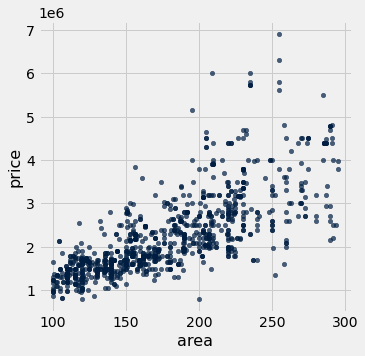

In [29]:
# Use .scatter on the 'sao_paulo' table
sao_paulo.scatter('area', 'price')

### What's the price of an apartment with area of 170 square meters?  Our prediction strategy:

1) Choose a small interval of values around 170 square meters: from 160 to 180

2) Take the average of *all* prices within that range of values

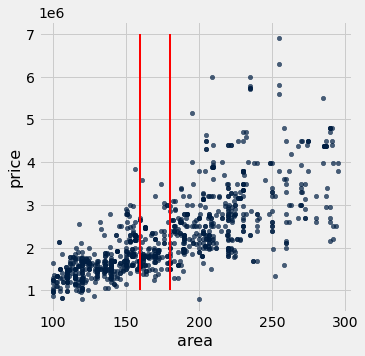

In [30]:
# Generate a plot with 'sao_paulo' table;
# show interval between 160 and 180 square meters.

sao_paulo.scatter('area', 'price')
plots.plot([160, 160], [1000000,7000000], color='red', lw=2)
plots.plot([180,180], [1000000,7000000], color='red', lw=2);

<font color='green'>  </font>

In [31]:
# Find the average of price for all apartments with area 
# between 160 and 180 square meters.
nearby = sao_paulo.where('area', are.between(160, 180))
nearby_mean = nearby.column('price').mean()
nearby_mean

1957500.0

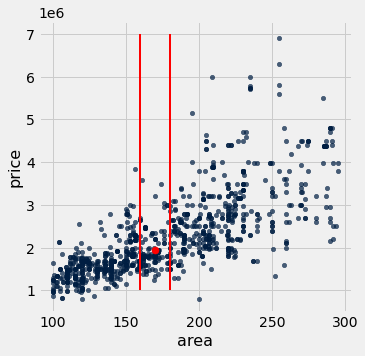

In [32]:
# Generate a plot with 'sao_paulo' table;
# show interval between 160 and 180 square meters.
# Include our predicted price for an apartment with
# area of 170 square meters.

sao_paulo.scatter('area', 'price')
plots.plot([160, 160], [1000000,7000000], color='red', lw=2)
plots.plot([180,180], [1000000,7000000], color='red', lw=2);
plots.scatter(170, nearby_mean, color='red', s=50);

In [34]:
# Write a new function, called 'predict', with a single 
# argument: the size of an apartment (in square meters).
# The function will return the predicted price of such an 
# apartment. 
def predict(a):
    """ This function will return the predicted price of an 
        apartment with area 'a' meters."""
    nearby = sao_paulo.where('area', \
                             are.between(a - 10, a + 10))
    return np.round(nearby.column('price').mean(), 2)

In [35]:
# Test our new function... 
predict(120)

1453026.32

In [36]:
# Test again...
predict(300)

3655294.12

In [40]:
# Apply our new function 'predict' to the 
# 'area' column of sao_paulo
predicted_price = sao_paulo.apply(predict, 'area')
predicted_price

array([3061743.8 , 1593729.38, 1593729.38, 1479719.18, 3323189.19,
       1593729.38, 1530726.18, 1530726.18, 2330412.29, 2822256.88,
       1483005.6 , 1593729.38, 1450800.  , 1976636.36, 2594610.69,
       1392566.93, 1288300.  , 2901192.  , 3316292.68, 1715051.6 ,
       1483005.6 , 2026878.5 , 3040642.86, 1962560.98, 1488544.49,
       1521935.22, 2431008.34, 2273927.93, 2026878.5 , 1609755.18,
       3506399.6 , 3452719.3 , 1917820.13, 3061743.8 , 1586031.61,
       1481836.88, 2333469.04, 3168154.64, 2711423.73, 1936540.51,
       3911250.  , 2351119.28, 2725764.24, 3061743.8 , 3061743.8 ,
       1443934.64, 1871445.51, 2594610.69, 1453026.32, 1455503.36,
       1453026.32, 2822256.88, 2822256.88, 1936540.51, 3309942.86,
       1754662.67, 2333469.04, 1957500.  , 3379241.94, 2711241.68,
       2706190.09, 2830495.58, 2822256.88, 1784996.36, 2739898.31,
       1453026.32, 2711423.73, 3061743.8 , 1979000.  , 2287107.14,
       2959422.76, 1957500.  , 2822256.88, 1953630.95, 2711423

In [42]:
# Add the array 'predicted_price' to the 'sao_paulo'
# table, using the .with_column method
sao_paulo = sao_paulo.with_column('predictedPrice', predicted_price)
sao_paulo

area,price,predictedPrice
230,3.79e+06,3.06174e+06
136,1.59e+06,1.59373e+06
136,1.5e+06,1.59373e+06
122,1.7e+06,1.47972e+06
252,1.35e+06,3.32319e+06
136,1.8e+06,1.59373e+06
130,1.4e+06,1.53073e+06
130,1.35e+06,1.53073e+06
186,1.9e+06,2.33041e+06
220,1.95e+06,2.82226e+06


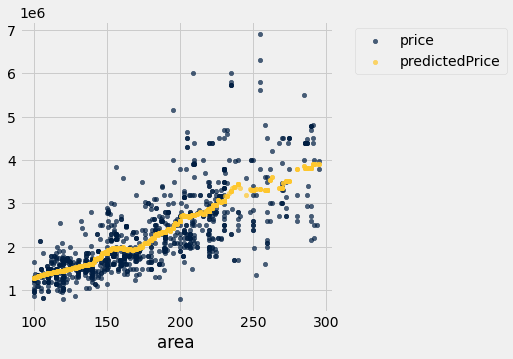

In [43]:
# Overlay the 'sao_paulo' data with predictions. 
# Use .select to make a new table with only columns 
# 'area', 'price', 'predictedPrice', 
# then use .scatter method
sao_paulo.select('area', 'price', 'predictedPrice').scatter('area')

## Prediction Accuracy ##

In [44]:
# Define a new function called 'difference' to measure 
# the difference between two values

def difference(x, y):
    return x - y

In [45]:
difference(5,10)

-5

In [46]:
# Apply the 'difference' function to the columns 
# 'predictedPrice' and 'price' of 'sao_paulo';
# use .apply

pred_errs =  sao_paulo.apply(difference, 'predictedPrice', 'price')
pred_errs

array([-7.28256200e+05,  3.72938000e+03,  9.37293800e+04, -2.20280820e+05,
        1.97318919e+06, -2.06270620e+05,  1.30726180e+05,  1.80726180e+05,
        4.30412290e+05,  8.72256880e+05, -1.69944000e+04,  9.37293800e+04,
       -4.49200000e+05, -2.33636400e+04, -1.05389310e+05,  4.25669300e+04,
        3.08300000e+05,  1.01192000e+05,  1.71629268e+06,  1.50516000e+04,
       -8.69944000e+04,  7.68785000e+04,  8.50642860e+05,  3.62560980e+05,
        1.08544490e+05,  3.21935220e+05, -2.72999266e+06, -2.26072070e+05,
        2.76878500e+05,  2.23755180e+05, -8.93600400e+05,  1.05271930e+06,
       -6.82179870e+05, -1.63825620e+06, -1.13968390e+05, -2.68163120e+05,
       -2.66530960e+05, -5.31845360e+05,  5.11423730e+05,  3.36540510e+05,
       -4.88750000e+05,  5.01119280e+05,  9.25764240e+05,  3.61743800e+05,
       -7.28256200e+05,  4.43934640e+05,  2.81445510e+05,  1.79461069e+06,
        2.63026320e+05,  5.55033600e+04,  5.30263200e+04,  4.22256880e+05,
        5.22256880e+05, -

In [48]:
# Add our column of prediction errors onto the `sao_paulo` 
# table; call. the new column 'errors'
sao_paulo =sao_paulo.with_columns('errors',pred_errs)
sao_paulo

area,price,predictedPrice,errors
230,3.79e+06,3.06174e+06,-728256
136,1.59e+06,1.59373e+06,3729.38
136,1.5e+06,1.59373e+06,93729.4
122,1.7e+06,1.47972e+06,-220281
252,1.35e+06,3.32319e+06,1.97319e+06
136,1.8e+06,1.59373e+06,-206271
130,1.4e+06,1.53073e+06,130726
130,1.35e+06,1.53073e+06,180726
186,1.9e+06,2.33041e+06,430412
220,1.95e+06,2.82226e+06,872257


/Users/thao-nhiluu/anaconda3/lib/python3.8/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


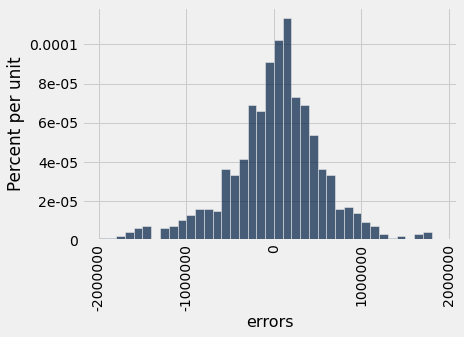

In [49]:
# Create a histogram of the new 'errors' column
# in 'sao_paulo' table

sao_paulo.hist('errors', bins=np.arange(-2000000, 2000000, 100000))

## Grouping by One Column ##

In [50]:
# Load the 'cones.csv' file as a table, name this new 
# table 'cones'
cones =  Table.read_table('cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [51]:
# Group the 'cones' table by 'Flavor' using .group method
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [52]:
# Group the 'cones' table by 'Flavor' using .group method;
# take average of corresponding prices for each category
cones.group('Flavor', np.average)

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [53]:
# Drop the 'Color' column from 'cones'.  Then
# Group the 'cones' table by 'Flavor' using .group method;
# take average of corresponding prices for each category
cones.drop('Color').group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [54]:
# Drop the 'Color' column from 'cones'.  Then
# Group the 'cones' table by 'Flavor' using .group method;
# take max of corresponding prices for each category
cones.drop('Color').group('Flavor', max)

Flavor,Price max
bubblegum,4.75
chocolate,5.25
strawberry,5.25


## Grouping by one column: A summary

The **group** method aggregates all rows with the same value for a column into a single row in the resulting table.

* First argument:      Which column to group by
* Second argument:     (Optional) How to combine values.  For example, we can use...
    * len - number of grouped values (this is the default)
    * list - list of all grouped values
    * sum - total of all grouped values

## Lists

Lists are generic sequences:

A list is a sequence of values (just like an array), but the values can all have different types

<font size = 4><font color='blue'> [2+3, 'four', Table().with_column('K', [3,4])]]
</font></font>

* List can be used to create table rows
* If you create a table column from a list, it will be converted into an array automatically
    

In [55]:
# Display 'cones' table
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [56]:
# Write a list; enter elements of list into square brackets
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [57]:
# Assign a list to a name 
a = [2,4,6]

In [58]:
# Find an element of our list by indexing
a[1]

4

In [59]:
[2,4,6]+[3,5,6]

[2, 4, 6, 3, 5, 6]

## Grouping by Two Columns ##

In [60]:
# Load the 'nba.salaries.csv' table, name it 'nba'
# Relabel the last column 'SALARY'
nba= Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [61]:
# Group the nba table by 'POSITION'
nba.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


In [62]:
# Group the 'nba' table by columns 'POSITION' and 'TEAM'
nba.group(['POSITION','TEAM']).show()

/Users/thao-nhiluu/anaconda3/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


POSITION,TEAM,count
C,Atlanta Hawks,3
C,Boston Celtics,3
C,Brooklyn Nets,1
C,Charlotte Hornets,3
C,Chicago Bulls,2
C,Cleveland Cavaliers,4
C,Dallas Mavericks,2
C,Denver Nuggets,4
C,Detroit Pistons,3
C,Golden State Warriors,3


In [63]:
# Group the 'nba' table by columns 'POSITION' and 'TEAM'; 
# sort by 'TEAM'
nba.group(['POSITION','TEAM']).sort('TEAM')

POSITION,TEAM,count
C,Atlanta Hawks,3
PF,Atlanta Hawks,2
PG,Atlanta Hawks,2
SF,Atlanta Hawks,2
SG,Atlanta Hawks,5
C,Boston Celtics,3
PF,Boston Celtics,2
PG,Boston Celtics,4
SF,Boston Celtics,2
SG,Boston Celtics,4


In [64]:
# Group the 'nba' table by columns 'POSITION' and 'TEAM'; 
# take average of corresponding grouped `SALARY` entries;
# sort by 'TEAM'
nba.group(['POSITION','TEAM'], np.average).sort('TEAM')

POSITION,TEAM,PLAYER average,SALARY average
C,Atlanta Hawks,,7.58542
PF,Atlanta Hawks,,11.0025
PG,Atlanta Hawks,,4.8817
SF,Atlanta Hawks,,3
SG,Atlanta Hawks,,1.80969
C,Boston Celtics,,2.45046
PF,Boston Celtics,,3.08548
PG,Boston Celtics,,4.97465
SF,Boston Celtics,,4.41716
SG,Boston Celtics,,2.00755


### Grouping by multiple columns: a summary

The **group** method can also aggregate all rows that share the combination of values in multiple columns
* First argument:       A list of which columns to group by
* Second argument:      (Optional) How to combine values





## Pivot Tables

In [65]:
# Create a pivot grid on the 'nba' table; use 'TEAM' and 
# 'POSITION' columns
nba.pivot('TEAM','POSITION')

POSITION,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
C,3,3,1,3,2,4,2,4,3,3,1,2,1,2,2,0,1,3,3,1,2,1,2,2,3,3,3,3,3,3
PF,2,2,3,3,2,1,2,2,0,3,4,3,2,4,7,3,2,3,3,4,3,5,4,3,3,0,2,4,3,3
PG,2,4,2,4,2,3,4,2,1,2,2,2,3,1,4,2,4,3,4,3,3,4,1,4,1,2,3,5,5,3
SF,2,2,2,2,2,1,1,4,4,4,2,4,2,3,4,4,3,2,3,3,4,1,3,2,2,3,3,3,3,4
SG,5,4,5,6,4,1,2,2,2,2,3,2,5,1,4,3,3,2,3,2,4,3,3,6,5,3,2,2,3,4


In [66]:
# Create a pivot grid on the 'nba' table; use 'TEAM' and 
# 'POSITION' columns.  Find maximum of corresponding 
# salary values. 
nba.pivot('TEAM', 'POSITION', values='SALARY', collect=max)


POSITION,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
C,12,2.61698,1.3629,13.5,13.4,14.2609,5.2,5.6135,6.5,13.8,22.3594,4,1.1006,15.5922,19.688,0,2.10929,12.1,9.21348,12.65,16.4075,11.25,4.62696,13,6.9808,15.852,7.5,4.66048,2.9,13
PF,18.6717,5,11.236,7,5.54373,19.689,15.4937,11.236,0,14.2609,2.48953,4.05,18.9077,3.13224,9.63856,22.1927,5.15244,8.5,8.5,4.13172,12.25,8.19303,6.5,5.5,3.07588,0,19.689,6.26867,4.775,8
PG,8,7.73034,6.3,12,20.0931,16.4075,5.37897,4.345,13.913,11.3708,12.4045,7,21.4687,5.10312,9.58843,14.783,6.6,12.7,10.5955,7.40281,16.7442,8.3445,2.14477,13.5,4.23629,9.5,13.4375,12,3.77772,15.852
SF,4,6.79612,24.8949,6.3314,2.38044,22.9705,15.3615,14,2.84196,11.7105,8.19303,17.1201,3.376,25,9.45,10.1516,1.95396,2.05692,3.38202,22.875,20.1586,16,10.1059,5.5,8.04289,12.4031,16.4075,13.6,15.4096,5.6135
SG,5.74648,3.42551,3.42551,13.1253,16.4075,8.98876,1.449,1.58448,6.27,15.501,15.7564,10.3,7.085,7,5.15854,20,14.7,7.085,15.514,8,5.13843,5.19252,2.86944,2.12784,6,6.06061,10,10.05,9.46348,5.69467


### Pivot
* Cross-classifies according to two categorical variables
* Produces a grid of counts or aggregated values
* Two required arguments:
    * First: variable that forms column labels of grid
    * Second: variable that forms row labels of grid
* Two optional arguments (include both or neither)
    * values= < column_label_to_aggregate > 
    * collect=function_to_aggregate_with

<font color='green'>  </font>